### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Text preprocessing](#cleaning)
    * [Lower case title variable](#section2_1)
    * [Remove punctuation](#section2_2)
    * [Removing stopwords](#section2_3)
    * [Remove URLs](#section2_4)
    * [Remove HTMLs](#section2_5)
    * [Tokenize cleaned title's](#section2_6)
* [Exploratory Data Analysis](#EDA)
* [Sentiment Analysis](#SA)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>

This notebook contains natural language analysis on Data Science Articles published in 2021. The goals for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/viniciuslambert/medium-2021-data-science-articles-dataset](https://www.kaggle.com/viniciuslambert/medium-2021-data-science-articles-dataset)

Information regarding the features for the data are located in the `Column` section on the website.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Imports the medium data as a pandas DataFrame
df= pd.read_csv("/Users/vishalsanjeevuni/Documents/datasets/medium 2021/medium-data-science-articles-2021.csv")

In [3]:
# Check data
df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
0,https://medium.com/@dharmeshpanchmatia/data-an...,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01
1,https://medium.com/predict/the-journey-from-an...,The journey from an Apple Silicon M1 powered l...,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01
2,https://medium.com/@rajsaraogi/demystifying-kp...,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE...,Большая разница: чем структурированная потоков...,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01
4,https://medium.com/@arnowa-44509/iot-a-new-way...,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, ...",0.0,0.0,3.0,Big Data,2021-01-01


In [4]:
# View DataFrame shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47660 entries, 0 to 47659
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           47660 non-null  object 
 1   title         47660 non-null  object 
 2   author        47660 non-null  object 
 3   author_page   47660 non-null  object 
 4   subtitle      13728 non-null  object 
 5   claps         47660 non-null  float64
 6   responses     47660 non-null  float64
 7   reading_time  47660 non-null  float64
 8   tag           47660 non-null  object 
 9   date          47660 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.6+ MB


Some notes
* The subtitle variable has 13728 values.
* All of the values in the DataFrame are strings, except for the claps, responses, reading_time variables.
* There are 47,660 articles present in the DataFrame.

## Analysis Plan ##

* Based on the data, I'm interested in performing sentiment analysis on the `title` variable, and statistical analysis on how sentiment varies between tags.


## NLP model ##

To accomplish this, I plan to include the following NLP tasks:

* Text preprocessing using regex and NLTK.
* Exploratory data analysis with pandas and seaborn.
* Sentiment analysis using bag-of-words and a Naive Bayes classifier.

## Text preprocessing tasks
* Noise Removal
    * Punctuation
    * Stopwords
    * URLs
    * HTML Tags

* Text Normalization 
    * Lower Casing

### Lower case title variable

In [5]:
# Sets all characters to lower case in Title
df["title_clean"] = df["title"].str.lower()
# View changes
df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date,title_clean
0,https://medium.com/@dharmeshpanchmatia/data-an...,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01,data analytics and ai/ml platform for ecommerce
1,https://medium.com/predict/the-journey-from-an...,The journey from an Apple Silicon M1 powered l...,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01,the journey from an apple silicon m1 powered l...
2,https://medium.com/@rajsaraogi/demystifying-kp...,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01,demystifying kpis in analytics
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE...,Большая разница: чем структурированная потоков...,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01,большая разница: чем структурированная потоков...
4,https://medium.com/@arnowa-44509/iot-a-new-way...,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, ...",0.0,0.0,3.0,Big Data,2021-01-01,iot: a new way of life


### Remove punctuation

In [6]:
# Remove punctiation from Message variable
df["title_clean"] = df["title_clean"].str.replace('[^\w\s]','')
# View changes
df.head()

/var/folders/8t/tzgdlqdj5w54xxsc1jk38grm0000gn/T/ipykernel_15900/2917609987.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["title_clean"] = df["title_clean"].str.replace('[^\w\s]','')


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date,title_clean
0,https://medium.com/@dharmeshpanchmatia/data-an...,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01,data analytics and aiml platform for ecommerce
1,https://medium.com/predict/the-journey-from-an...,The journey from an Apple Silicon M1 powered l...,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01,the journey from an apple silicon m1 powered l...
2,https://medium.com/@rajsaraogi/demystifying-kp...,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01,demystifying kpis in analytics
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE...,Большая разница: чем структурированная потоков...,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01,большая разница чем структурированная потокова...
4,https://medium.com/@arnowa-44509/iot-a-new-way...,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, ...",0.0,0.0,3.0,Big Data,2021-01-01,iot a new way of life


### Removing stopwords

In [7]:
# Import NLTK library
import nltk

In [8]:
# Import stopwords
from nltk.corpus import stopwords

# View stopwords in english
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

### Remove URLs

In [9]:
# Import re library for regular expressions
import re

In [10]:
# Create a function to remove url from Message data
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [11]:
# Remove URLs from data

df["title_clean"] = df["title_clean"].apply(lambda text: remove_urls(text))
# View changes
df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date,title_clean
0,https://medium.com/@dharmeshpanchmatia/data-an...,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01,data analytics and aiml platform for ecommerce
1,https://medium.com/predict/the-journey-from-an...,The journey from an Apple Silicon M1 powered l...,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01,the journey from an apple silicon m1 powered l...
2,https://medium.com/@rajsaraogi/demystifying-kp...,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01,demystifying kpis in analytics
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE...,Большая разница: чем структурированная потоков...,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01,большая разница чем структурированная потокова...
4,https://medium.com/@arnowa-44509/iot-a-new-way...,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, ...",0.0,0.0,3.0,Big Data,2021-01-01,iot a new way of life


### Remove HTMLs

In [12]:
# Create a function to remove HTML Tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [13]:
# Remove HTML from Message data
df["title_clean"] = df["title_clean"].apply(lambda text: remove_html(text))
# View changes
df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date,title_clean
0,https://medium.com/@dharmeshpanchmatia/data-an...,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01,data analytics and aiml platform for ecommerce
1,https://medium.com/predict/the-journey-from-an...,The journey from an Apple Silicon M1 powered l...,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01,the journey from an apple silicon m1 powered l...
2,https://medium.com/@rajsaraogi/demystifying-kp...,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01,demystifying kpis in analytics
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE...,Большая разница: чем структурированная потоков...,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01,большая разница чем структурированная потокова...
4,https://medium.com/@arnowa-44509/iot-a-new-way...,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, ...",0.0,0.0,3.0,Big Data,2021-01-01,iot a new way of life


### Tokenize cleaned title's

In [14]:
# Import word_tokenize from nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# Tokenize cleaned messages
df['title_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['title_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vishalsanjeevuni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date,title_clean,title_tokenized
0,https://medium.com/@dharmeshpanchmatia/data-an...,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01,data analytics and aiml platform for ecommerce,"[data, analytics, and, aiml, platform, for, ec..."
1,https://medium.com/predict/the-journey-from-an...,The journey from an Apple Silicon M1 powered l...,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01,the journey from an apple silicon m1 powered l...,"[the, journey, from, an, apple, silicon, m1, p..."
2,https://medium.com/@rajsaraogi/demystifying-kp...,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01,demystifying kpis in analytics,"[demystifying, kpis, in, analytics]"
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE...,Большая разница: чем структурированная потоков...,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01,большая разница чем структурированная потокова...,"[большая, разница, чем, структурированная, пот..."
4,https://medium.com/@arnowa-44509/iot-a-new-way...,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, ...",0.0,0.0,3.0,Big Data,2021-01-01,iot a new way of life,"[iot, a, new, way, of, life]"


In [15]:
# Save the preprocessed DataFrame
df.to_csv('processed_clean_medium.csv', header = True)

### Exploratory Data Analysis

In [16]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function for plotting in notebook
%matplotlib inline

In [17]:
# Count the number of unique tags
df['tag'].nunique()

7

In [18]:
# View message count by country
df['tag'].value_counts()

Data Science              11415
Machine Learning          10747
Artificial Inteligence    10160
Data                       6703
Deep Learning              3972
Analytics                  2412
Big Data                   2251
Name: tag, dtype: int64

<AxesSubplot:>

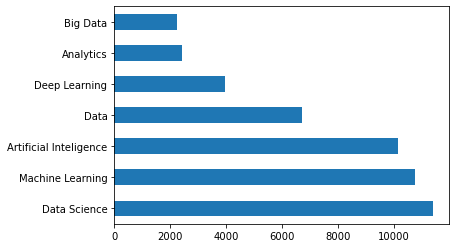

In [19]:
# Number of messages per category
tag_value_counts = df['tag'].value_counts() 


# Plot a bar chart using pandas built-in plotting apis
tag_value_counts.plot.barh() 

### Sentiment Analysis

Now that I have conducted some light EDA, I will primarily use models from the NLTK library. Here a title will be categorized into one of two categories:

* Positve
* Negative

I will use Naive Bayes classification to determining the sentiment of the titles in the `title` variable. This will involve using Twitter data with known sentiments to create a classifier. 


In [20]:
# Download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/vishalsanjeevuni/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vishalsanjeevuni/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vishalsanjeevuni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

After downloading the Twitter data from the `nltk` library, I will import it from `nltk.corpus` as `twitter_samples`.

In [21]:
# import the twitter data
from nltk.corpus import twitter_samples

In [22]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [23]:
# View first positive tweet
print(positive_tweets[0])
# View number of positive tweets
print('There are {} positive tweets.'.format(len(positive_tweets)))

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
There are 5000 positive tweets.


In [24]:
# View first negative tweet
print(negative_tweets[0])
# View number of negative tweets
print('There are {} negative tweets.'.format(len(negative_tweets)))

hopeless for tmr :(
There are 5000 negative tweets.


In [25]:
# Create tokens from the positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print(pos_tweet_tokens[0])

# Create tokens from the positive tweets
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
# Show the first tokenized tweet
print(neg_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


Since I removed HTML tags and URLs in the SMS data, I'll do the same for the tweets. I'll use the same functions for this as I defined above.

In [26]:
# Define lists for preprocessed tokens
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# Positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)

# Negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

Now I need to select the features for my classifier. I will select the most common words in my corpus because I assume that these words are the best indicators if something is positive or negative. I will use a frequency distribution to select them.

In [27]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130058

In [28]:
#create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print(len(all_tokens))
print(all_tokens.most_common(10))

#select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

#check what this list looks like
sentiment_features[:5]

22692
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


[':(', ':)', '!', 'I', '.']

Creating a feature extractor that identifies when a feature is present in a message.

In [29]:
def document_features(document, sentiment_features):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all my features, check if that feature is in my target message
    for token in sentiment_features:
        #make a dictionary for each message 
        features[token] = (token in document_tokens)
    return features

#test it on a sample sentence
test_sentence = "coding is fun with codecademy :)".split(" ")
print(document_features(test_sentence, sentiment_features))

{':(': False, ':)': True, '!': False, 'I': False, '.': False, 'to': False, 'you': False, 'the': False, '': False, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': False, 'in': False, 'is': True, 'me': False, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': True, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if': 

Now I need to create training and testing sets, and label them accordingly. 70% of the tweets will be used for the training set, and 30% for the testing set. Using the `random` library, I can randomly select the tweets for each.

In [30]:
# Import random library
import random

# Create positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet, "Positive") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "Negative") for tweet in negative_cleaned_tweets_list]

# Create the combined dataset
all_labeled_tweets = positive_tw + negative_tw

#initialize the random number so I get the same result every time
random.seed(42)
# Shuffle the order of the dataset NOTE that the random method applies in place
random.shuffle(all_labeled_tweets)

#create a list of (token, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]
# Separate the dataset into the training and testing sets
train_set, test_set = feature_set[:7000], feature_set[7000:]

I will use the `NaiveBayesClassifier` model with my training and testing sets to build my sentiment model. I will use the `classify()` function to test the performance of my model on my training set. 

In [31]:
# Import classify and sentiment analysis model
from nltk import classify
from nltk import NaiveBayesClassifier

# Instant iate a classifier and train on training data (this will take awhile)
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is:", classify.accuracy(classifier, test_set))

#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is: 0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           

Now I will use my model to classify the sentiment of my messages. I will try it out on just one before applying it to the whole corpus

In [34]:
# Select one sample message to evaluate
sample_title = str(df["title_tokenized"][49])
print(sample_title)

# Print prediction of sentiment
print(classifier.classify(dict([token, True] for token in sample_title)))

['complete', 'shap', 'tutorial', 'for', 'model', 'explanation', 'part', '2', 'shapley', 'value', 'as', 'feature', 'contribution']
Negative


The sentiment of the 50th message (`"['complete', 'shap', 'tutorial', 'for', 'model', 'explanation', 'part', '2', 'shapley', 'value', 'as', 'feature', 'contribution']"`) is Negative per my model. 

Now I will evaluate all the title's in the medium data Corpus.

In [35]:
# Create an empty list
sentiments = []

# Iterate through the column and predict each response's sentiment, append 
# sentiment to new list
for message in df['title_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))

# add the list back to our DataFrame
df['Sentiment'] = sentiments

df['Sentiment'].value_counts()

Positive    28730
Negative    18930
Name: Sentiment, dtype: int64

In [36]:
# View the proportion of the corpus in each class
df['Sentiment'].value_counts(normalize = True)

Positive    0.602812
Negative    0.397188
Name: Sentiment, dtype: float64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

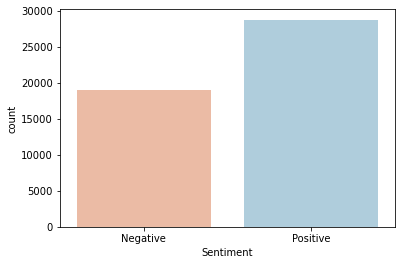

In [37]:
# View distribution in a countplot
sns.countplot(x='Sentiment', data=df, palette='RdBu')

My model predicts that 60.2% of the messages in the data are Positive.

Now I want to compare sentiment by category. To make this easier, I will transform my sentiment into a numeric variable. I will assign Positive messages '1' and Negative messages '-1'. 

In [38]:
# Define a function to convert sentiment into binary values
def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1

# Create new feature based on the values returned from function
df['Sentiment_score'] = df['Sentiment'].apply(convert_sentiment)

#check 
df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date,title_clean,title_tokenized,Sentiment,Sentiment_score
0,https://medium.com/@dharmeshpanchmatia/data-an...,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01,data analytics and aiml platform for ecommerce,"[data, analytics, and, aiml, platform, for, ec...",Negative,-1
1,https://medium.com/predict/the-journey-from-an...,The journey from an Apple Silicon M1 powered l...,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01,the journey from an apple silicon m1 powered l...,"[the, journey, from, an, apple, silicon, m1, p...",Positive,1
2,https://medium.com/@rajsaraogi/demystifying-kp...,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01,demystifying kpis in analytics,"[demystifying, kpis, in, analytics]",Positive,1
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE...,Большая разница: чем структурированная потоков...,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01,большая разница чем структурированная потокова...,"[большая, разница, чем, структурированная, пот...",Negative,-1
4,https://medium.com/@arnowa-44509/iot-a-new-way...,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, ...",0.0,0.0,3.0,Big Data,2021-01-01,iot a new way of life,"[iot, a, new, way, of, life]",Positive,1


Now I will group by category and use the `.mean()` method to get the average sentiment score for each category.

In [39]:
#create a new dataframe grouped by countries and aggregated by the mean.
df_sent = df.groupby(['tag']).mean()

#reset the index
df_sent.reset_index(inplace=True)

df_sent.head()

,tag,claps,responses,reading_time,Sentiment_score
0,Analytics,36.002073,0.128939,5.002488,0.174959
1,Artificial Inteligence,60.561614,0.359055,4.852756,0.326378
2,Big Data,31.403821,0.086184,4.992448,-0.107952
3,Data,37.455020,0.172013,4.093689,-0.035954
4,Data Science,50.171178,0.308454,5.362681,0.131669


I want to know which category sends the most positive messages, so I will use the `.sort_values()` method.

In [40]:
# Sort DataFrame by Sentiment_score
df_sent.sort_values(by='Sentiment_score') 

,tag,claps,responses,reading_time,Sentiment_score
2,Big Data,31.403821,0.086184,4.992448,-0.107952
3,Data,37.455020,0.172013,4.093689,-0.035954
4,Data Science,50.171178,0.308454,5.362681,0.131669
0,Analytics,36.002073,0.128939,5.002488,0.174959
1,Artificial Inteligence,60.561614,0.359055,4.852756,0.326378
6,Machine Learning,44.918396,0.195124,5.536987,0.331348
5,Deep Learning,42.783484,0.168681,6.020645,0.373112


Now I will plot the sentiment by country to see which countries are the most Positive/Negative.

<AxesSubplot:xlabel='tag', ylabel='Sentiment_score'>

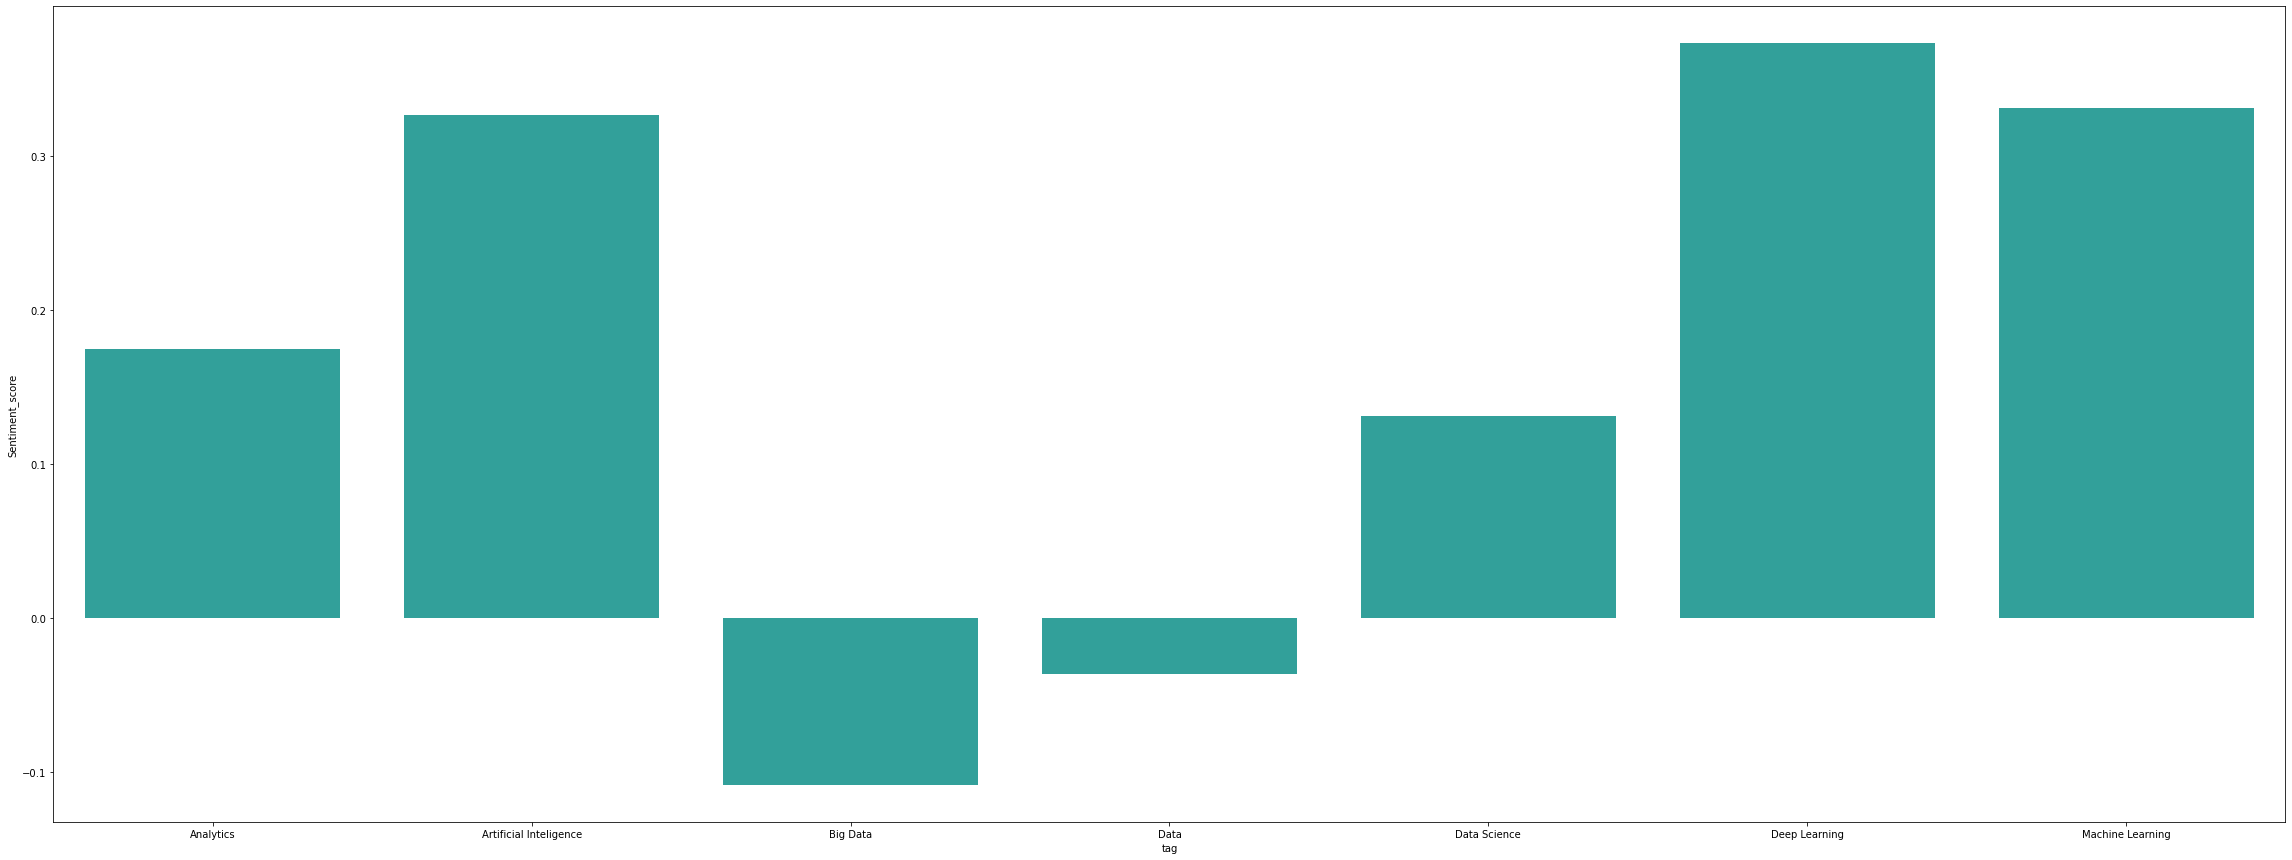

In [42]:
# Plot general sentiments
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='tag', y='Sentiment_score', data=df_sent, ax=ax,
                 color="lightseagreen")